<a href="https://colab.research.google.com/github/soulayman-al-abdallah/Data-Science-Projects/blob/main/M05_Stroke_State_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Objective:** We will use deep learning to develop a solution that predicts if a person will have a stroke or not. And then, we'll try some improvement methods.


**Dataset Explanation:** We will be using the stroke dataset. Its features are:


* **id:** unique identifier
* **gender:** "Male", "Female" or "Other"
* **age:** age of the patient
* **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married:** "No" or "Yes"
* **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type:** "Rural" or "Urban"
* **avg_glucose_level:** average glucose level in blood
* **bmi:** body mass index
* **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke:** 1 if the patient had a stroke or 0 if not

#Importing Libraries

In [1]:
import numpy as np
import pandas as pd

#Loading the Dataset

In [25]:
path = '/content/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(path)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Exploratory Data Analysis

###Shape of the data

In [26]:
data.shape

(5110, 12)

###Types of different Columns

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Dealing with categorical variables

In [28]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [29]:
data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [30]:
data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [31]:
data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [32]:
data['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [33]:
data['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [34]:
data ['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#Preprocessing

###Dealing with Nulls

In [35]:
# fill the nulls of bmi column with the mean value
data['bmi'].fillna(value=data['bmi'].mean(), inplace=True)
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

####Encoding Categorical Features

Here we will encode those categorical variables to be able to use them to train our DL model.

In [36]:
# encode those categorical variables to be able to use them to train our DL model

from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
data['smoking_status'] = encoder.fit_transform(data['smoking_status'])
data['Residence_type'] = encoder.fit_transform(data['Residence_type'])
data['work_type'] = encoder.fit_transform(data['work_type'])
data['ever_married'] = encoder.fit_transform(data['ever_married'])
data['gender'] = encoder.fit_transform(data['gender'])

###Normalizing Features

Now we normalize the input data by dividing with the max value of each column.

In [37]:
data = data.divide(data.max(axis=0))

data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.500656,0.207143,0.527154,0.097456,0.054012,0.656164,0.541928,0.508023,0.390622,0.296037,0.458969,0.048728
std,0.290125,0.246522,0.275764,0.296607,0.226063,0.475034,0.272573,0.499985,0.166643,0.078873,0.357178,0.215320
min,0.000919,0.000000,0.000976,0.000000,0.000000,0.000000,0.000000,0.000000,0.202841,0.105533,0.000000,0.000000
25%,0.243231,0.000000,0.304878,0.000000,0.000000,0.000000,0.500000,0.000000,0.284261,0.243852,0.000000,0.000000
50%,0.506334,0.000000,0.548780,0.000000,0.000000,1.000000,0.500000,1.000000,0.338136,0.290984,0.666667,0.000000
75%,0.749685,0.500000,0.743902,0.000000,0.000000,1.000000,0.750000,1.000000,0.419850,0.336066,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###Removing Unnecessary Features

In [38]:
# we can remove the ID feature because it's irrelevant to our predictions
data = data.drop('id', axis=1)

#Building the DL Model

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(32, input_dim=10, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 4)                 36        
                                                                 
 dense_10 (Dense)            (None, 2)                 10        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 1,065
Trainable params: 1,065
Non-traina

###Compiling the model

In [40]:
#compile the model & we want to measure the accuracy, precision and recall to know better about the performance of our model.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

###Fitting the data

In [41]:
#we take the first columns as features and the last column as a label, then we split our dataset between training and testing, 
#and we fit the model on training data, and validate on the testing data. The training happens for 15 epochs.

from sklearn.model_selection import train_test_split

x = data.iloc[:,:-1]
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
112/112 [==============================] - 2s 7ms/step - loss: 0.2830 - accuracy: 0.9514 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.2057 - val_accuracy: 0.9511 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/15
112/112 [==============================] - 0s 4ms/step - loss: 0.1933 - accuracy: 0.9514 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.1866 - val_accuracy: 0.9511 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/15
112/112 [==============================] - 0s 3ms/step - loss: 0.1799 - accuracy: 0.9514 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.1753 - val_accuracy: 0.9511 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/15
112/112 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9514 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.1702 - val_accuracy: 0.9511 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 5/

**▶  We can see that:**

We have a precision and a recall so close to zero, which means the model is not predicting any positive value, so we need to improve it.



---



#Improving DL Models

###Checking For Data Imbalance

We check for imbalance because we have a poor recall and precision.

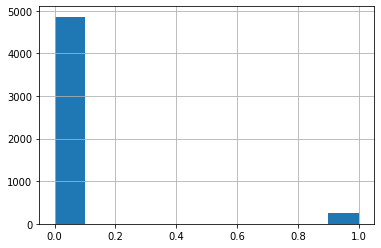

In [21]:
#checking if there is an imbalance case by visualizing the stroke data using a histogram
data['stroke'].hist()

**▶ We can say that:**

We have a huge imbalance in the data, this is why we fix it with oversamppling and undersampling.

We will oversample this time using the SMOTE() function instead of random oversampling, and this is because SMOTE will generate new data based on the data that we have, so we avoid overfitting.

(array([4861.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4861.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

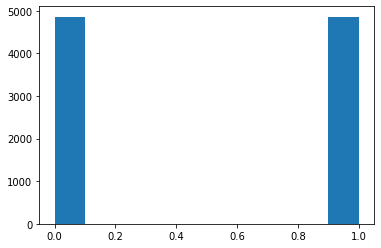

In [42]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


over = SMOTE()
x_new, y_new = over.fit_resample(x, y)

plt.hist([y_new])

Now we will fit our same model on the new data that we have.

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
213/213 [==============================] - 1s 3ms/step - loss: 0.5574 - accuracy: 0.7367 - precision_2: 0.7581 - recall_2: 0.6909 - val_loss: 0.5123 - val_accuracy: 0.7875 - val_precision_2: 0.7528 - val_recall_2: 0.8639
Epoch 2/15
213/213 [==============================] - 1s 3ms/step - loss: 0.4898 - accuracy: 0.7891 - precision_2: 0.7531 - recall_2: 0.8570 - val_loss: 0.4850 - val_accuracy: 0.7875 - val_precision_2: 0.7395 - val_recall_2: 0.8957
Epoch 3/15
213/213 [==============================] - 1s 3ms/step - loss: 0.4701 - accuracy: 0.7932 - precision_2: 0.7517 - recall_2: 0.8723 - val_loss: 0.4715 - val_accuracy: 0.7960 - val_precision_2: 0.7732 - val_recall_2: 0.8450
Epoch 4/15
213/213 [==============================] - 1s 3ms/step - loss: 0.4561 - accuracy: 0.7976 - precision_2: 0.7571 - recall_2: 0.8732 - val_loss: 0.4537 - val_accuracy: 0.7974 - val_precision_2: 0.7517 - val_recall_2: 0.8957
Epoch 5/15
213/213 [==============================] - 1s 3ms/step - loss

**▶ We can see that:**

the performance gets better when our data became balanced.
Now we will try improving our model with other techniques like model hyperparameter tuning



---



###Model Design Optimization

We will use batch normalization after each layer.

In [46]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(32, input_dim=10, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                352       
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_6 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_7 (Batc  (None, 8)               

Let's train the model

In [48]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
213/213 [==============================] - 4s 6ms/step - loss: 0.4114 - accuracy: 0.8028 - precision_5: 0.7545 - recall_5: 0.8945 - val_loss: 0.3953 - val_accuracy: 0.8094 - val_precision_5: 0.7529 - val_recall_5: 0.9282
Epoch 2/15
213/213 [==============================] - 1s 4ms/step - loss: 0.4153 - accuracy: 0.8004 - precision_5: 0.7608 - recall_5: 0.8732 - val_loss: 0.4018 - val_accuracy: 0.8008 - val_precision_5: 0.7314 - val_recall_5: 0.9587
Epoch 3/15
213/213 [==============================] - 1s 4ms/step - loss: 0.4076 - accuracy: 0.8087 - precision_5: 0.7638 - recall_5: 0.8907 - val_loss: 0.3850 - val_accuracy: 0.8121 - val_precision_5: 0.7556 - val_recall_5: 0.9296
Epoch 4/15
213/213 [==============================] - 1s 4ms/step - loss: 0.4062 - accuracy: 0.8025 - precision_5: 0.7613 - recall_5: 0.8783 - val_loss: 0.3871 - val_accuracy: 0.8135 - val_precision_5: 0.7545 - val_recall_5: 0.9364
Epoch 5/15
213/213 [==============================] - 1s 4ms/step - loss

We see that we are achieving better metrics (more significant in the validation metrics) with batch normalization. 👍



---



###Hyperparameter Tuning

Now we will tune some hyperparameters of our model.

We start by wrapping our keras model inside a kerasClassifier to be able to use it in Scikit Learn

In [50]:
from keras.wrappers.scikit_learn import KerasClassifier

#create a fn that create the model when called
def create_model():

  model = Sequential()

  model.add(Dense(32, input_dim=10, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(16, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(8, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(4, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(2, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
  return model 

#create an instance of the wrapper and pass it the fn as an argument
model_wrapper = KerasClassifier(build_fn=create_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


We will tune the batch size and the number of epochs.

In [ ]:
from sklearn.model_selection import GridSearchCV

#pass the instance (model_wrapper) to the tuning tool by sklearn call gridsearchCV,     rather than passing the model itself.
params = {'batch_size': [50, 100],
          'epochs': [50, 100]}

grid = GridSearchCV(estimator=model_wrapper, param_grid=params, cv=3, verbose=3)
grid_result = grid.fit(x_train, y_train)

In [52]:
best_parameters = grid.best_params_
print(best_parameters)
best_score = grid.best_score_
print(best_score)

{'batch_size': 100, 'epochs': 100}
0.8623063365618387


Fitting to the model on the best hyperparameters we obtained.

In [53]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 100, batch_size=50)

Epoch 1/100
137/137 [==============================] - 3s 7ms/step - loss: 0.6591 - accuracy: 0.6508 - precision_19: 0.7360 - recall_19: 0.4645 - val_loss: 0.6447 - val_accuracy: 0.6469 - val_precision_19: 0.7492 - val_recall_19: 0.4550
Epoch 2/100
137/137 [==============================] - 1s 4ms/step - loss: 0.5869 - accuracy: 0.7080 - precision_19: 0.7651 - recall_19: 0.5957 - val_loss: 0.5926 - val_accuracy: 0.7110 - val_precision_19: 0.7255 - val_recall_19: 0.6906
Epoch 3/100
137/137 [==============================] - 1s 4ms/step - loss: 0.5315 - accuracy: 0.7559 - precision_19: 0.7752 - recall_19: 0.7172 - val_loss: 0.5363 - val_accuracy: 0.7477 - val_precision_19: 0.7066 - val_recall_19: 0.8578
Epoch 4/100
137/137 [==============================] - 1s 4ms/step - loss: 0.4889 - accuracy: 0.7783 - precision_19: 0.7593 - recall_19: 0.8112 - val_loss: 0.4705 - val_accuracy: 0.7912 - val_precision_19: 0.7449 - val_recall_19: 0.8937
Epoch 5/100
137/137 [==============================]

We achieved 87% accuracy on the test set which is a great result.